In [7]:
import pandas as pd

df=pd.read_csv('..\\..\\data\\mm_names.csv', index_col = 0)

df.dropna(inplace=True)
df['Name'] = df['Name'].str.lower().replace(' ', '_')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# # Check your data and define X and y : What is X and what is y? 
# df['Name'] = df['Name'].str.lower().replace(' ', '_')
# y = df['Gender'].values #target 
# df = df.iloc[:,1:]
# X = df.drop(columns = 'Gender').values #remaining columns
df.info

<bound method DataFrame.info of             Name  Gender
0        aungkyi       1
1        aungmay       1
2            aye       1
3         ayeaye       1
4     ayeayeaung       1
...          ...     ...
5319     zeyawin       0
5320     zinaung       0
5321   zinmintun       0
5322       zinoo       0
5323   zinthaung       0

[5323 rows x 2 columns]>

In [8]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

# X_train, X_test, y_train, y_test = train_test_split(X,y, 
#                                     test_size = 0.40, 
#                                     random_state=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Name'], df['Gender'], test_size=0.2, random_state=42)
X_test.shape

(1065,)

In [9]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------## 
#--------------------------------------------------

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

steps = [('vect', CountVectorizer(ngram_range=(1, 2))),  # Include unigrams and bigrams
         ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation,         
         ('knn', KNeighborsClassifier(n_neighbors = 3))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [10]:
# Predict the gender for the test data
y_pred = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

name = "Than Zaw Toe"  # Replace with the name you want to predict
y_pred = knn_pipeline.predict([name])[0]
gender = pd.Series(y_pred).map({0: 'male', 1: 'female'}).to_string().split()[1]

print("Predicted gender:", gender)

Accuracy Score: 0.3812206572769953
Predicted gender: female


In [11]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print("Confusion Matrix")
print(mat_clf)
print("\nClassificaton Report")
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

Confusion Matrix
[[  0 594]
 [ 65 406]]

Classificaton Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       594
           1       0.41      0.86      0.55       471

    accuracy                           0.38      1065
   macro avg       0.20      0.43      0.28      1065
weighted avg       0.18      0.38      0.24      1065

0.4309978768577495


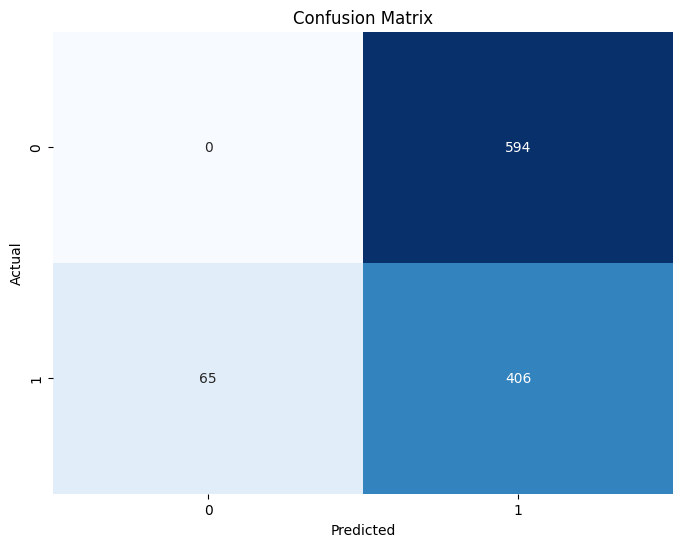

In [12]:
#Visulization

import matplotlib.pyplot as plt
import seaborn as sns
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mat_clf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[2425    1]
 [ 237 1595]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2426
           1       1.00      0.87      0.93      1832

    accuracy                           0.94      4258
   macro avg       0.96      0.94      0.94      4258
weighted avg       0.95      0.94      0.94      4258

0.9351104933093813
